In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
#conda install -c conda-forge fbprophet

In [27]:
#pip install plotly

In [19]:
df_ts = pd.read_pickle("/Users/vishalpattanshetty/USF/GitHub/pft/datasets/serialized/merged.pkl")
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 814243 entries, 0 to 814242
Data columns (total 16 columns):
calendar_day                814243 non-null datetime64[ns]
sku                         814243 non-null object
size                        811071 non-null object
block                       807619 non-null object
ph                          813878 non-null object
IN_material_description     774593 non-null object
IN_material_type            774593 non-null object
IN_strategy                 767339 non-null category
IN_shape                    771786 non-null object
IN_steel_grade              771786 non-null object
IN_length_text              769268 non-null object
IN_tons                     774593 non-null float64
SO_order_qty_sales_units    77225 non-null float64
SO_confirmed_qty            77225 non-null float64
SH_shipment_tons            89182 non-null float64
PR_ton                      9740 non-null float64
dtypes: category(1), datetime64[ns](1), float64(5), object(9)
m

In [20]:
df_ts=df_ts.loc[df_ts["PR_ton"]>=0]

In [22]:
df_ts['PR_ton'].count()

8603

## Let's get the basics right!

In [4]:
df_ts=df_ts.set_index('calendar_day')
df_ts=df_ts.resample('M').sum()

In [7]:
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2016-01-31 to 2020-12-31
Freq: M
Data columns (total 5 columns):
IN_tons                     60 non-null float64
SO_order_qty_sales_units    60 non-null float64
SO_confirmed_qty            60 non-null float64
SH_shipment_tons            60 non-null float64
PR_ton                      60 non-null float64
dtypes: float64(5)
memory usage: 2.8 KB


In [23]:
train_dataset= pd.DataFrame()
train_dataset['ds'] = df_ts["calendar_day"]
train_dataset['y']=df_ts['PR_ton']

In [24]:
train_dataset=train_dataset.set_index('ds')
train_dataset=train_dataset.resample('M').sum()

In [25]:
train_dataset.describe()

,y
count,48.000000
mean,35695.250000
std,9293.637131
min,8220.000000
25%,32415.500000
50%,37508.000000
75%,40598.750000
max,54306.000000


In [12]:
train_dataset = train_dataset.reset_index().rename(columns={'ds':'ds', 'y':'y'})

In [13]:
from fbprophet import Prophet
prophet_basic = Prophet()
prophet_basic.fit(train_dataset)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
//anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [14]:
future= prophet_basic.make_future_dataframe(periods=24)
future.tail(10)

,ds
74,2021-01-15
75,2021-01-16
76,2021-01-17
77,2021-01-18
78,2021-01-19
79,2021-01-20
80,2021-01-21
81,2021-01-22
82,2021-01-23
83,2021-01-24


In [15]:
forecast=prophet_basic.predict(future)

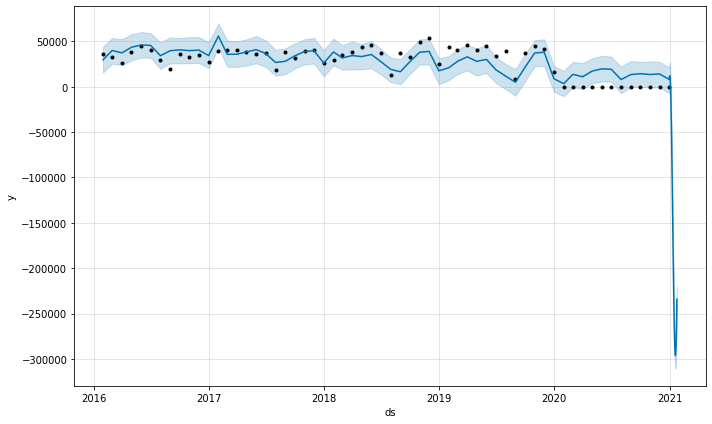

In [16]:
fig1 =prophet_basic.plot(forecast)